# Pandas repetition

## Read in calories ino dataframe

In [1]:
import pandas as pd

df = pd.read_excel("calories.xlsx")
df.head()  # picks the top 5 by default

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [2]:
df.head(3)

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ


In [3]:
df.tail()  # five last rows

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
2220,Spreads,Sunflower Butter,100g,617 cal,2591 kJ
2221,Spreads,Tapenade,100g,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100g,717 cal,3011 kJ
2223,Spreads,Vegemite,100g,180 cal,756 kJ
2224,Spreads,Wild Honey,100g,286 cal,1201 kJ


In [4]:
df.sample(3)  # 3 rows at random

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
1044,(Fruit)Juices,Apricot Nectar,100ml,56 cal,235 kJ
2173,Sauces&Dressings,Soy Sauce,100ml,67 cal,281 kJ
2027,Herbs&Spices,Parsley,100g,36 cal,151 kJ


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   object
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [6]:
df["per100grams"].value_counts()

per100grams
100g     1802
100ml     423
Name: count, dtype: int64

In [7]:
food_categories = df["FoodCategory"].value_counts().head()
food_categories

FoodCategory
BakingIngredients    95
Cakes&Pies           91
Herbs&Spices         90
Beer                 85
Candy&Sweets         81
Name: count, dtype: int64

a dataframe is composed of one or many series

In [8]:
print(f"{type(food_categories) = }")
print(f"{type(df) = }")
print(f"{type(df['FoodItem']) = }")

type(food_categories) = <class 'pandas.core.series.Series'>
type(df) = <class 'pandas.core.frame.DataFrame'>
type(df['FoodItem']) = <class 'pandas.core.series.Series'>


<Axes: title={'center': 'Top five food categories in the dataset'}, xlabel='Food category', ylabel='Frequency count'>

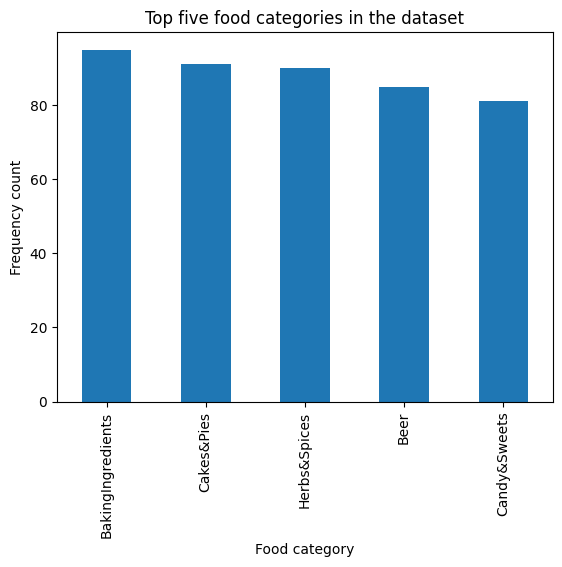

In [9]:
food_categories.plot(
    kind="bar",
    xlabel="Food category",
    ylabel="Frequency count",
    title="Top five food categories in the dataset",
)


## clean columns

- per100grams -> int,name:per100
- Cals_per100grams -> int, name: calories


In [10]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [13]:
df["per100grams"] = df["per100grams"].str[:3].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FoodCategory      2225 non-null   object
 1   FoodItem          2225 non-null   object
 2   per100grams       2225 non-null   int64 
 3   Cals_per100grams  2225 non-null   object
 4   KJ_per100grams    2225 non-null   object
dtypes: int64(1), object(4)
memory usage: 87.0+ KB


In [14]:
df["Cals_per100grams"].head()

0    62 cal
1    48 cal
2    92 cal
3    88 cal
4    54 cal
Name: Cals_per100grams, dtype: object

In [15]:
df["Cals_per100grams"].str[:-3].astype(int)

0        62
1        48
2        92
3        88
4        54
       ... 
2220    617
2221    233
2222    717
2223    180
2224    286
Name: Cals_per100grams, Length: 2225, dtype: int64

In [16]:
df["Cals_per100grams"] = df["Cals_per100grams"].str.replace(" cal", "").astype(int)
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100,62,260 kJ
1,CannedFruit,Canned Apricots,100,48,202 kJ
2,CannedFruit,Canned Blackberries,100,92,386 kJ
3,CannedFruit,Canned Blueberries,100,88,370 kJ
4,CannedFruit,Canned Cherries,100,54,227 kJ


In [17]:
df_cleaned = df.rename(
    {"Cals_per100grams": "calories", "per100grams": "per100"}, axis="columns"
)
df_cleaned.head()

,FoodCategory,FoodItem,per100,calories,KJ_per100grams
0,CannedFruit,Applesauce,100,62,260 kJ
1,CannedFruit,Canned Apricots,100,48,202 kJ
2,CannedFruit,Canned Blackberries,100,92,386 kJ
3,CannedFruit,Canned Blueberries,100,88,370 kJ
4,CannedFruit,Canned Cherries,100,54,227 kJ
